In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14

In [141]:
aging = pd.read_csv('../../AngelesLeighton2016/kallisto/si2_aging_analysis.csv', comment='#')
fog = pd.read_csv('../../AngelesLeighton2016/kallisto/si3_genotype_analysis.csv', comment='#')
female = pd.read_csv('../../AngelesLeighton2016/kallisto/si4_interaction_analysis.csv', comment='#')

In [189]:
aging = aging[aging.qval < 0.1].copy()
fog = fog[fog.qval < 0.1].copy()
female = female[female.qval < 0.1].copy()
aging['analysis'] = 'aging'
fog['analysis'] = 'fog'
female['analysis'] = 'interaction'
df = pd.concat([aging, fog, female])

In [190]:
counts = df.groupby('target_id').analysis.count()

In [191]:
counts = counts[counts == 3].index
print(len(counts))

455


In [192]:
df = df[df.target_id.isin(counts)]

In [193]:
mat = df.pivot(index='target_id', columns='analysis', values='b')
signed = mat.apply(np.sign).copy()
female_state = (signed.aging == signed.fog) & (signed.interaction == - signed.aging)

In [194]:
female_state.sum()

439

In [195]:
fem = df[df.target_id.isin(mat[female_state].index)].copy()

In [196]:
fem.ens_gene.nunique()

429

In [197]:
fem_genes = fem.groupby(['analysis', 'ens_gene']).b.apply(np.mean).reset_index()
fem_genes = fem_genes[fem_genes.analysis.isin(['aging', 'fog'])].groupby('ens_gene').b.apply(np.mean)

In [213]:
print(fem_genes.shape)

(359,)


In [214]:
res = pd.read_csv('../data/master_table.tsv', sep='\t', index_col=0)
fem_genes = fem_genes[fem_genes.index.isin(res.index)]

In [216]:
intersection = np.in1d(res[res.padj50 < 0.05].index, fem_genes.index.unique())
scipy.stats.hypergeom.sf(intersection.sum(), len(res), fem_genes.index.nunique(), (res.padj50 < 0.05).sum())

4.1021065851498376e-15

In [217]:
femres = res[res.padj50 < 0.05][intersection]

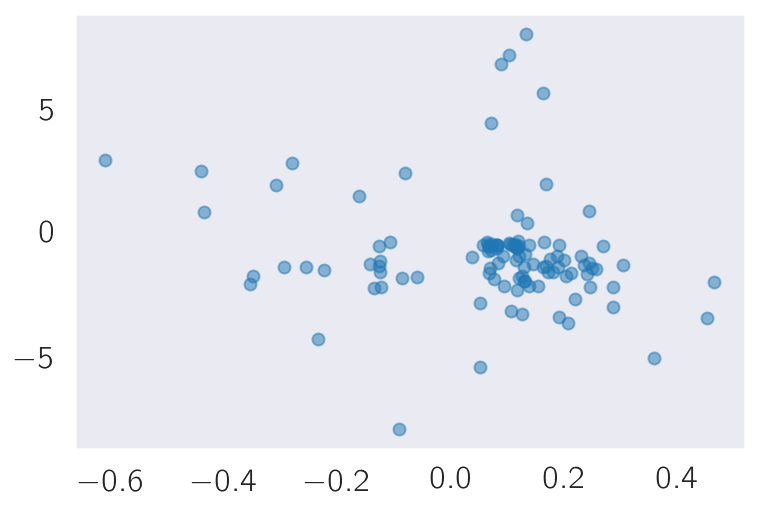

In [218]:
plt.scatter(femres.log2FoldChange50, fem_genes.reindex(femres.index) / np.log(2), alpha=0.5)


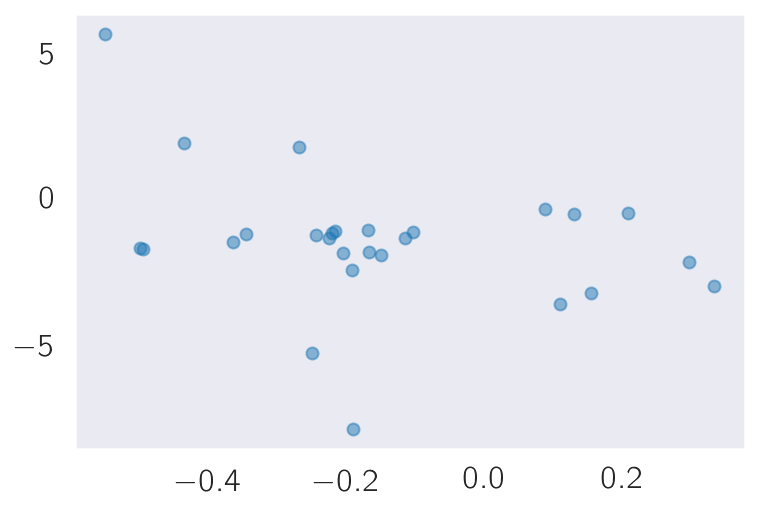

In [203]:
intersection = np.in1d(res[res.padj58 < 0.05].index, fem_genes.index.unique())
scipy.stats.hypergeom.sf(intersection.sum(), len(res), fem_genes.index.nunique(), (res.padj58 < 0.05).sum())
femres = res[res.padj58 < 0.05][intersection]
plt.scatter(femres.log2FoldChange58, fem_genes.reindex(femres.index) / np.log(2), alpha=0.5)


In [186]:
scipy.stats.hypergeom.sf(intersection.sum(), len(res), fem_genes.index.nunique(), (res.padj58 < 0.05).sum())

0.005877559736172351

In [212]:
cond = (res.externalgenename.isin(['sri-40', 'ins-11', 'ins-12', 'acbp-3', 'delm-2', 'acd-1', 'nhx-2', 'daf-36', 'acox-1.3', 'cyp-25A3', 'col-43', 'col-125', 'wrt-10', 'lpr-6']))
res[cond & (res.padj50 < 0.05)][['externalgenename','padj50', 'padj58', 'log2FoldChange50', 'log2FoldChange58']]

,externalgenename,padj50,padj58,log2FoldChange50,log2FoldChange58
WBGene00000699,col-125,1.740184e-75,5.347962e-14,-0.425134,-1.174739
WBGene00003730,nhx-2,6.839789e-03,4.213168e-01,0.136922,0.110014
WBGene00005552,sri-40,3.465420e-02,9.458965e-01,0.243750,0.027373
WBGene00007536,daf-36,3.626030e-02,3.828174e-01,0.345258,0.284457
WBGene00008566,acox-1.3,2.937562e-08,2.977165e-01,0.358261,0.151324
WBGene00009818,acbp-3,4.251700e-02,7.673025e-01,0.369079,0.195476


In [211]:
res[cond & (res.padj58 < 0.05)][['externalgenename','padj50', 'padj58', 'log2FoldChange50', 'log2FoldChange58']]

,externalgenename,padj50,padj58,log2FoldChange50,log2FoldChange58
WBGene00000699,col-125,1.740184e-75,5.347962e-14,-0.425134,-1.174739


In [224]:
femres[['externalgenename', 'log2FoldChange50']].sort_values('log2FoldChange50').head(40)

,externalgenename,log2FoldChange50
WBGene00018707,oac-31,-0.611912
WBGene00018418,F44E2.4,-0.443433
WBGene00020902,jmjc-1,-0.437464
WBGene00007228,acs-7,-0.356655
WBGene00012339,W07G4.5,-0.350569
WBGene00022649,ZK84.1,-0.310391
WBGene00013875,ZC376.3,-0.296510
WBGene00017471,F14H12.3,-0.281749
WBGene00017071,aagr-1,-0.256258
WBGene00000708,col-135,-0.235997


In [225]:
femres[['externalgenename', 'log2FoldChange50']].sort_values('log2FoldChange50').tail(40)

,externalgenename,log2FoldChange50
WBGene00044080,D1086.10,0.130268
WBGene00006913,vha-4,0.131077
WBGene00006438,nrfl-1,0.131489
WBGene00011259,miz-1,0.134746
WBGene00021869,vrp-1,0.136745
WBGene00002879,let-754,0.136773
WBGene00020517,hpo-8,0.144594
WBGene00006930,vit-6,0.153215
WBGene00000114,alh-8,0.161635
WBGene00004000,pgp-6,0.162073


In [223]:
femres.shape

(108, 48)